# **Matrix Plot**

Matrix plots are grid-style plots that are great for visualizing data relationships or patterns, especially in 2D matrices like correlation matrices.

📌 Types of Matrix Plots in Seaborn 

1) **heatmap()**

Used to plot rectangular data as a color-encoded matrix.

Most commonly used for correlation matrices.

Colors make it easy to identify patterns or outliers.

2) **clustermap()**

Similar to heatmap() but also performs hierarchical clustering.

Automatically reorders rows and columns to show groups/clusters.

Helps in discovering natural structure in the data. 


3)  **What is a Pivot Table Heatmap?** 

A pivot table allows us to reshape data before plotting.
When combined with a heatmap, it’s a powerful way to visualize relationships
between multiple categories and a numerical value.

📌 Use Case:
Suppose you want to analyze the average tip amount per day by gender.    

In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt 

# **Heat Map**

In [3]:
flights=sns.load_dataset('flights') 
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [4]:
tips=sns.load_dataset('tips') 
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


📊 **What is Correlation?**

Correlation is a statistical measure that describes the strength and direction of a relationship between two numerical variables. 

✅ Key Points:
**Range: Correlation values range from -1 to +1** 
| Value | Meaning                      |
| ----- | ---------------------------- |
| `+1`  | Perfect positive correlation |
| `0`   | No correlation               |
| `-1`  | Perfect negative correlation |


🧠 Types of Correlation:
**Positive Correlation:** When one variable increases, the other also increases.

Example: Height 📈 vs Weight 📈

**Negative Correlation:** When one variable increases, the other decreases.

Example: Speed 📈 vs Travel Time 📉

**No Correlation:** No clear relationship between variables.

Example: Shoe size 👟 vs Intelligence 🧠

In [5]:
# # Select only numerical columns from tips dataset for correlation
tipscorrelations=tips[['total_bill','tip','size']] 
tipscorrelations 

#👉 Above  line:

#Creates a new DataFrame tipscorrelations that includes only the numerical columns.

#Displays the selected data

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


In [6]:
# Correlation matrixabs 
# Correlation matrix
tipscorrelations.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<Axes: >

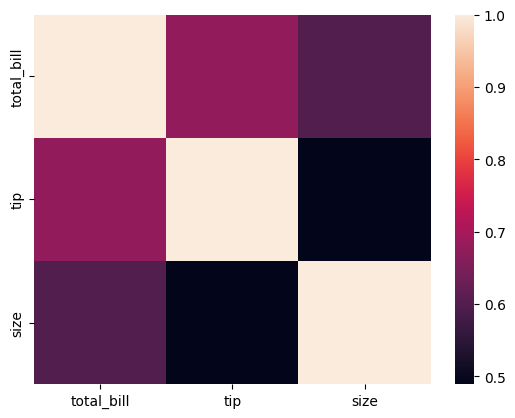

In [7]:
sns.heatmap(tipscorrelations.corr())

<Axes: >

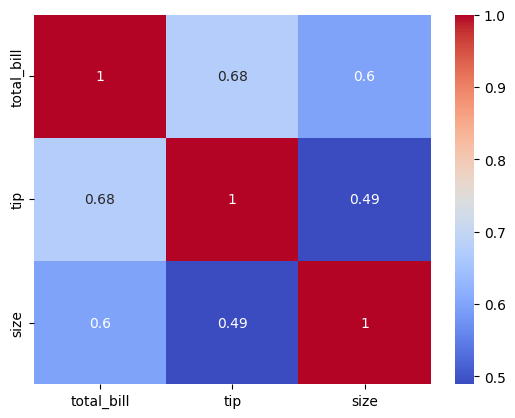

In [8]:
sns.heatmap(tipscorrelations.corr(), annot=True, cmap='coolwarm')


🔍 **Explanation of each part:** 
| Component                 | Meaning                                                                                                                                                                                                                            |
| ------------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `tipscorrelations.corr()` | ➤ Calculates the **correlation matrix** for the numerical columns.<br>➤ Correlation values range from -1 to 1:<br> • **1** = Perfect Positive Correlation<br> • **0** = No Correlation<br> • **-1** = Perfect Negative Correlation |
| `sns.heatmap(...)`        | ➤ Uses **Seaborn** to plot a heatmap from the correlation matrix.                                                                                                                                                                  |
| `annot=True`              | ➤ Adds the **actual correlation values** inside each square of the heatmap.                                                                                                                                                        |
| `cmap='coolwarm'`         | ➤ Sets the **color scheme**:<br> • **Cool colors (blue)** represent negative correlations<br> • **Warm colors (red)** represent positive correlations                                                                              |


# **Cluster Map**

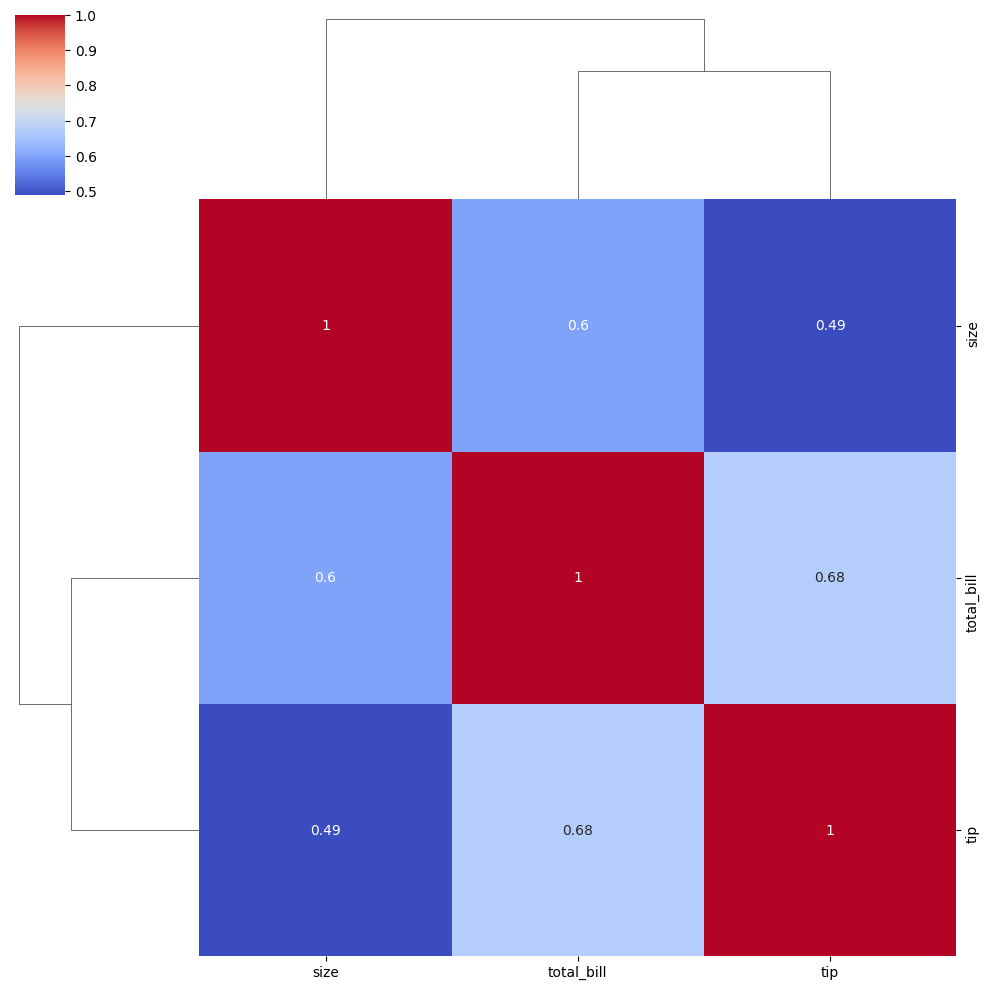

In [9]:
sns.clustermap(tipscorrelations.corr(), annot=True, cmap='coolwarm')

# **Pivot heat map** 

In [10]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [11]:
pvtflight=flights.pivot_table(values='passengers',index='month',columns='year') 
pvtflight

C:\Users\himan\AppData\Local\Temp\ipykernel_18312\2924728500.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pvtflight=flights.pivot_table(values='passengers',index='month',columns='year')


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112.0,115.0,145.0,171.0,196.0,204.0,242.0,284.0,315.0,340.0,360.0,417.0
Feb,118.0,126.0,150.0,180.0,196.0,188.0,233.0,277.0,301.0,318.0,342.0,391.0
Mar,132.0,141.0,178.0,193.0,236.0,235.0,267.0,317.0,356.0,362.0,406.0,419.0
Apr,129.0,135.0,163.0,181.0,235.0,227.0,269.0,313.0,348.0,348.0,396.0,461.0
May,121.0,125.0,172.0,183.0,229.0,234.0,270.0,318.0,355.0,363.0,420.0,472.0
Jun,135.0,149.0,178.0,218.0,243.0,264.0,315.0,374.0,422.0,435.0,472.0,535.0
Jul,148.0,170.0,199.0,230.0,264.0,302.0,364.0,413.0,465.0,491.0,548.0,622.0
Aug,148.0,170.0,199.0,242.0,272.0,293.0,347.0,405.0,467.0,505.0,559.0,606.0
Sep,136.0,158.0,184.0,209.0,237.0,259.0,312.0,355.0,404.0,404.0,463.0,508.0


<Axes: xlabel='year', ylabel='month'>

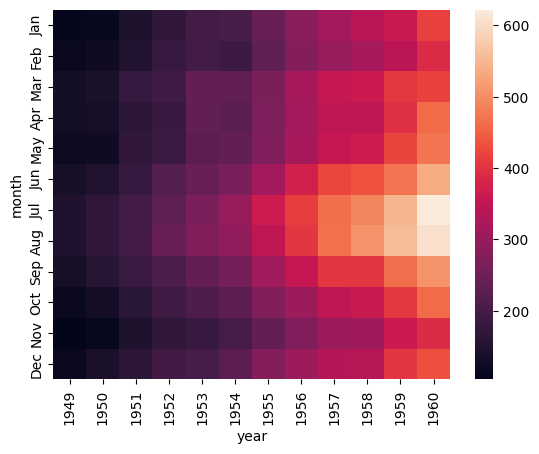

In [12]:
sns.heatmap(pvtflight)

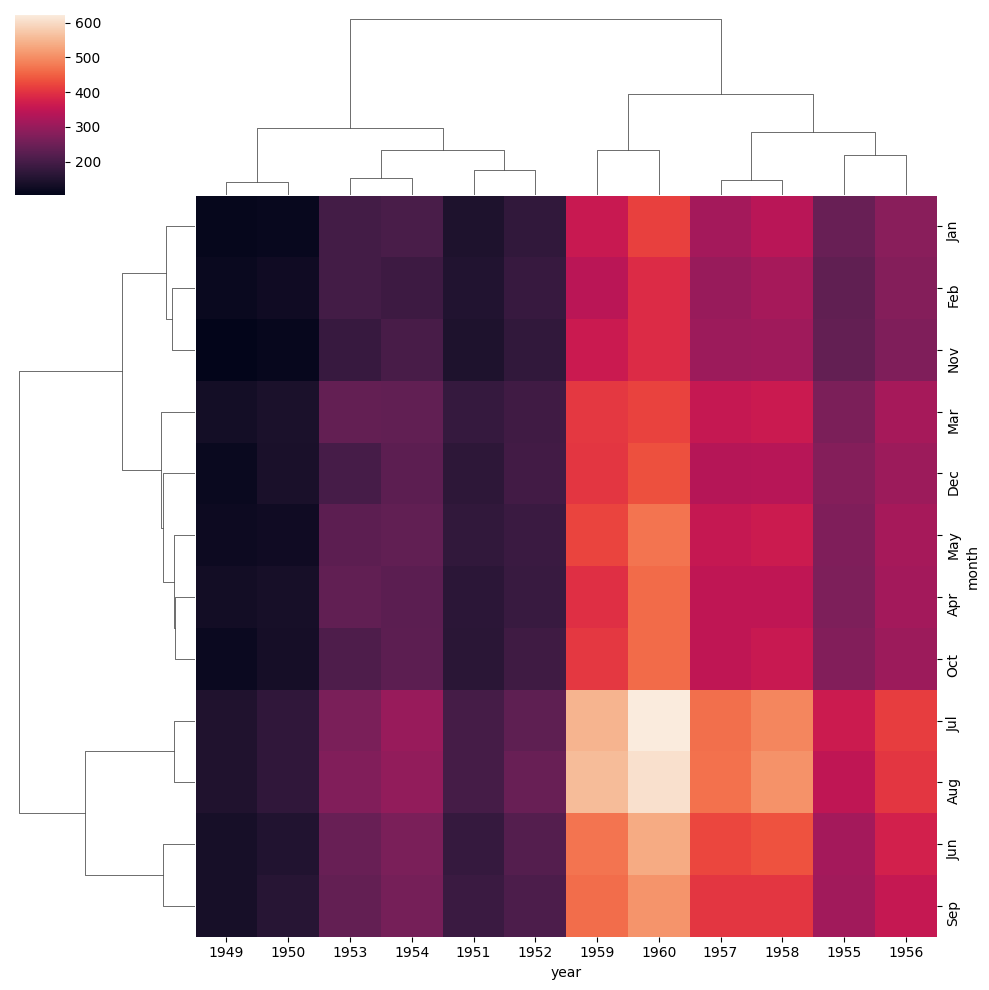

In [13]:
sns.clustermap(pvtflight)